# Counterfeit detection

The task in this assignment is to detect the  counterfeit banknotes. The data set is based on [banknote authentication Data Set ](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#) from UCI Machine Learning repository.  You have already used this set but this time I have removed  the first column. The set  `banknote_authentication.csv` can be found in the `data`  directory.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

from sklearn.mixture import GaussianMixture

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

from sklearn.mixture import GaussianMixture

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc





In [14]:
data = pd.read_csv('data/banknote_authentication.csv' )

In [15]:
data.head()

,a1,a2,a3,counterfeit
0,12.3784,0.70403,-7.58360,0
1,8.1881,-3.13380,-2.52760,0
2,-10.8679,9.49260,-1.41160,1
3,-8.7903,7.97350,-0.45475,1
4,-5.5167,10.93900,-0.40820,1


## Problem 

### A.

Perform the Quadratic Discriminant Analysis on this set. Calculate the confusion matrix, AUC score and plot the ROC curve. 

Training set confusion matrix:
 [[0.8275154  0.1724846 ]
 [0.19487179 0.80512821]]
Training set ROC AUC score: 0.8921602695730004
Test set confusion matrix:
 [[0.76229508 0.23770492]
 [0.14285714 0.85714286]]
Test set ROC AUC score: 0.8606557377049181


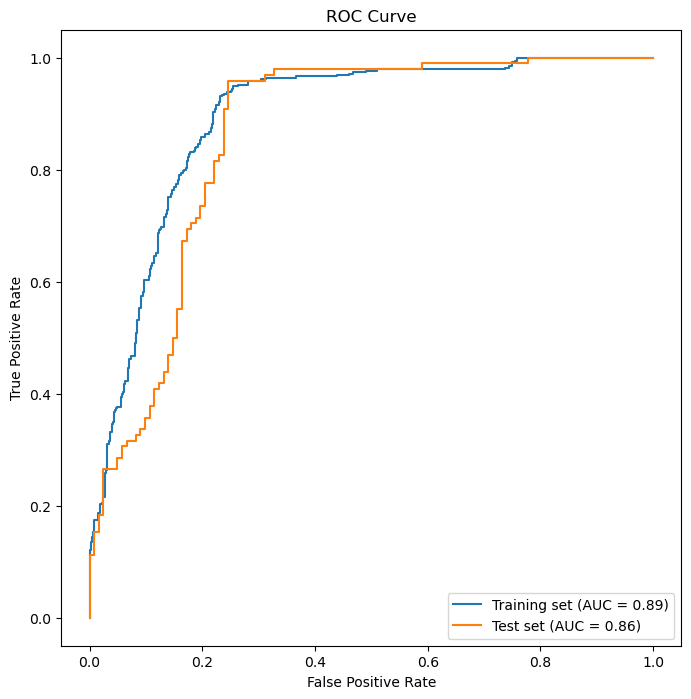

In [16]:
# Load the data
data = pd.read_csv('data/banknote_authentication.csv')

# Separate features and labels
X = data.drop(columns='counterfeit')
y = data['counterfeit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions
y_train_pred = qda.predict(X_train)
y_train_prob = qda.predict_proba(X_train)[:, 1]
y_test_pred = qda.predict(X_test)
y_test_prob = qda.predict_proba(X_test)[:, 1]

# Calculate metrics
train_conf_matrix = confusion_matrix(y_train, y_train_pred, normalize='true')
test_conf_matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Print metrics
print("Training set confusion matrix:\n", train_conf_matrix)
print("Training set ROC AUC score:", train_roc_auc)
print("Test set confusion matrix:\n", test_conf_matrix)
print("Test set ROC AUC score:", test_roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(train_fpr, train_tpr, label=f'Training set (AUC = {train_roc_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test set (AUC = {test_roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### B.

Perform Gaussian Mixture Discriminant Analysis on this set as described in the `gaussian_mixture_model_EM_algorithm` notebook. Use two components for positives and two components for negatives. Calculate the confusion matrix, AUC score and plot the ROC curve. 

Test set confusion matrix (GMM):
 [[0.95081967 0.04918033]
 [0.12244898 0.87755102]]
Test set ROC AUC score (GMM): 0.9647875543660087


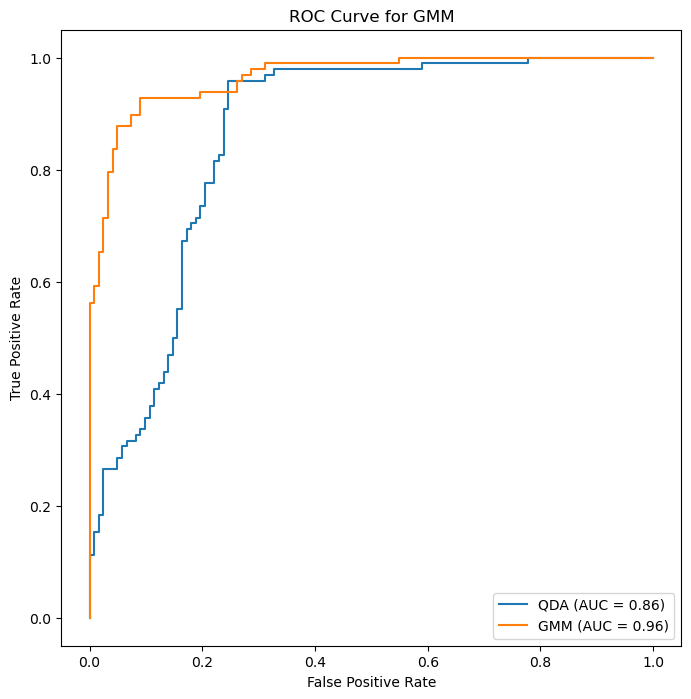

In [17]:
# Calculate class priors
class_counts = y.value_counts()
class_priors = class_counts / len(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Gaussian Mixture Models with class priors
gmm_pos = GaussianMixture(n_components=2, random_state=42, weights_init=[class_priors[1], 1 - class_priors[1]])
gmm_neg = GaussianMixture(n_components=2, random_state=42, weights_init=[class_priors[0], 1 - class_priors[0]])

# Fit the models
gmm_pos.fit(X_train[y_train == 1])
gmm_neg.fit(X_train[y_train == 0])

# Calculate the log likelihood for each class
log_likelihood_pos = gmm_pos.score_samples(X_test)
log_likelihood_neg = gmm_neg.score_samples(X_test)

# Predict based on higher log likelihood
y_test_gmm_pred = (log_likelihood_pos > log_likelihood_neg).astype(int)
y_test_gmm_prob = np.exp(log_likelihood_pos) / (np.exp(log_likelihood_pos) + np.exp(log_likelihood_neg))

# Calculate metrics
test_gmm_conf_matrix = confusion_matrix(y_test, y_test_gmm_pred, normalize='true')
test_gmm_roc_auc = roc_auc_score(y_test, y_test_gmm_prob)
test_fpr_gmm, test_tpr_gmm, _ = roc_curve(y_test, y_test_gmm_prob)

# Print metrics
print("Test set confusion matrix (GMM):\n", test_gmm_conf_matrix)
print("Test set ROC AUC score (GMM):", test_gmm_roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(test_fpr, test_tpr, label=f'QDA (AUC = {test_roc_auc:.2f})')
plt.plot(test_fpr_gmm, test_tpr_gmm, label=f'GMM (AUC = {test_gmm_roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GMM')
plt.legend()
plt.show()

### C.

Use k-fold cross validation to find the optimal number of gaussian components for each class. Use the f1-score as the performance metric. As before calculate the confusion matrix, AUC score and plot the ROC curve for the best classifier. Assume that maximal number of components in each class is 12. Remember that th enumber of clusters in each class does not have to be equal.  

__Hint__ use the `StratifiedKFold` function from scikit-learn library to generate folds. 

Best GMM Components: (7, 8)
Test set confusion matrix (Best GMM):
 [[0.95901639 0.04098361]
 [0.03061224 0.96938776]]
Test set ROC AUC score (Best GMM): 0.9961525593844094


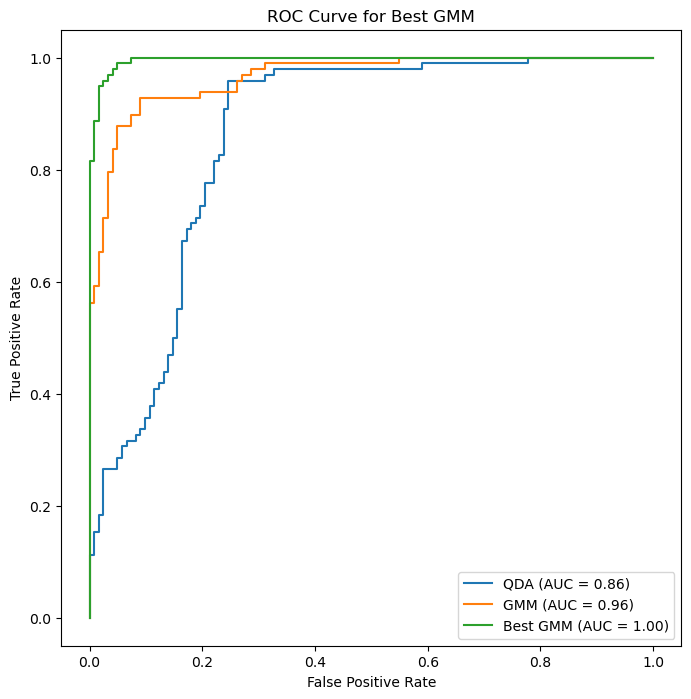

In [18]:
# Parameters
max_components = 12
k_folds = 5
best_f1_score = 0
best_n_components = (1, 1)  # Initialize with minimal number of components

# Calculate class priors
class_counts = y.value_counts()
class_priors = class_counts / len(y)

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

for n_pos in range(1, max_components + 1):
    for n_neg in range(1, max_components + 1):
        f1_scores = []
        
        for train_idx, val_idx in skf.split(X, y):
            X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
            y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
            
            # Initialize Gaussian Mixture Models
            gmm_pos_cv = GaussianMixture(n_components=n_pos, random_state=42)
            gmm_neg_cv = GaussianMixture(n_components=n_neg, random_state=42)
            
            gmm_pos_cv.fit(X_train_cv[y_train_cv == 1])
            gmm_neg_cv.fit(X_train_cv[y_train_cv == 0])
            
            log_likelihood_pos_cv = gmm_pos_cv.score_samples(X_val_cv)
            log_likelihood_neg_cv = gmm_neg_cv.score_samples(X_val_cv)
            
            y_val_gmm_pred_cv = (log_likelihood_pos_cv > log_likelihood_neg_cv).astype(int)
            f1_scores.append(f1_score(y_val_cv, y_val_gmm_pred_cv))
        
        avg_f1_score = np.mean(f1_scores)
        
        if avg_f1_score > best_f1_score:
            best_f1_score = avg_f1_score
            best_n_components = (n_pos, n_neg)

# Train the best model on the entire training set
best_gmm_pos = GaussianMixture(n_components=best_n_components[0], random_state=42)
best_gmm_neg = GaussianMixture(n_components=best_n_components[1], random_state=42)
best_gmm_pos.fit(X[y == 1])
best_gmm_neg.fit(X[y == 0])

log_likelihood_pos_best = best_gmm_pos.score_samples(X_test)
log_likelihood_neg_best = best_gmm_neg.score_samples(X_test)

y_test_gmm_best_pred = (log_likelihood_pos_best > log_likelihood_neg_best).astype(int)
y_test_gmm_best_prob = np.exp(log_likelihood_pos_best) / (np.exp(log_likelihood_pos_best) + np.exp(log_likelihood_neg_best))

# Calculate metrics
test_gmm_best_conf_matrix = confusion_matrix(y_test, y_test_gmm_best_pred, normalize='true')
test_gmm_best_roc_auc = roc_auc_score(y_test, y_test_gmm_best_prob)
test_gmm_best_fpr, test_gmm_best_tpr, _ = roc_curve(y_test, y_test_gmm_best_prob)
test_gmm_fpr, test_gmm_tpr, _ = roc_curve(y_test, y_test_gmm_prob)

# Print metrics
print("Best GMM Components:", best_n_components)
print("Test set confusion matrix (Best GMM):\n", test_gmm_best_conf_matrix)
print("Test set ROC AUC score (Best GMM):", test_gmm_best_roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(test_fpr, test_tpr, label=f'QDA (AUC = {test_roc_auc:.2f})')
plt.plot(test_gmm_fpr, test_gmm_tpr, label=f'GMM (AUC = {test_gmm_roc_auc:.2f})')
plt.plot(test_gmm_best_fpr, test_gmm_best_tpr, label=f'Best GMM (AUC = {test_gmm_best_roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best GMM')
plt.legend()
plt.show()


## D.  

Assume that 1% of all the customers in your store try to pay with a counterfeit 100PLN bill. If you accept the counterfeit bill you loose 100PLN. If you reject a valid bill,  you may loose the purchase, you estimate this loss as 15PLN on average. For each of the three classifiers find the threshold that minimises your losses and calculates the minimum loss for each classifier. Show the optimal classifiers points on the ROC curves.

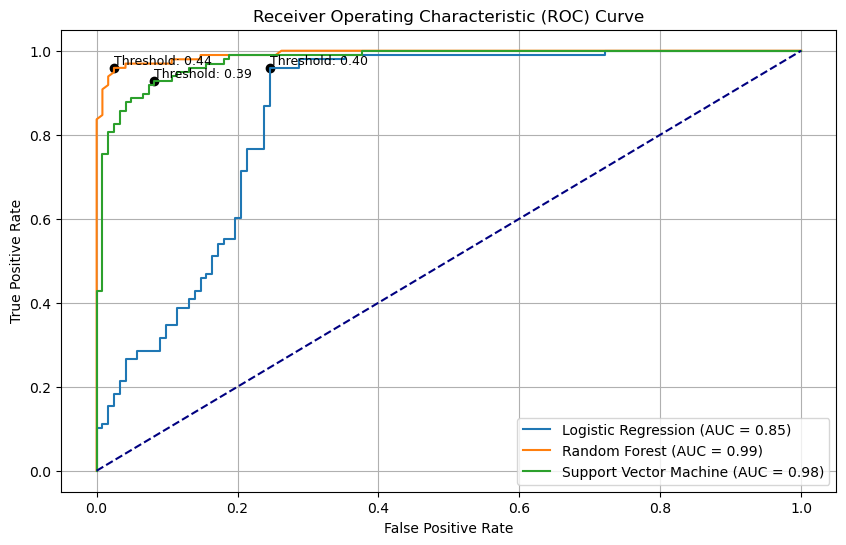

Optimal threshold (Logistic Regression): 0.40
Optimal threshold (Random Forest): 0.44
Optimal threshold (Support Vector Machine): 0.39
Minimum loss (Logistic Regression): 25.20
Minimum loss (Random Forest): 3.07
Minimum loss (Support Vector Machine): 9.27


In [20]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Dictionary to store ROC curve data
roc_data = {}

# Train classifiers and generate ROC curves
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[clf_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'thresholds': thresholds}

# Plot ROC curves
plt.figure(figsize=(10, 6))
for clf_name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{clf_name} (AUC = {data["roc_auc"]:.2f})')

# Find optimal thresholds and mark on ROC curves
optimal_thresholds = {}
min_losses = {}
for clf_name, data in roc_data.items():
    optimal_threshold_idx = np.argmax(data['tpr'] - data['fpr'])
    optimal_threshold = data['thresholds'][optimal_threshold_idx]
    optimal_tpr = data['tpr'][optimal_threshold_idx]
    optimal_fpr = data['fpr'][optimal_threshold_idx]
    loss = (optimal_fpr * 100 + (1 - optimal_tpr) * 15)  # Calculating minimum loss
    optimal_thresholds[clf_name] = optimal_threshold
    min_losses[clf_name] = loss
    plt.scatter(optimal_fpr, optimal_tpr, marker='o', color='black')
    plt.text(optimal_fpr, optimal_tpr, f'Threshold: {optimal_threshold:.2f}', fontsize=9, verticalalignment='bottom')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print optimal thresholds and minimum losses
for clf_name, threshold in optimal_thresholds.items():
    print(f"Optimal threshold ({clf_name}): {threshold:.2f}")

for clf_name, loss in min_losses.items():
    print(f"Minimum loss ({clf_name}): {loss:.2f}")